### NAME - KANDALAM VENKATA GODAVARI SRIVIDYA
## TASK-3: EXPLORATORY DATA ANALYSIS FOR RETAIL DATA
### #GRIPAPRIL22 TASK-3

#### Objective-Analyse given data and figure out why we are facing loss and is that reason specific.


#### What are the products in which we are facing loss.


#### Does loss depend on any other feature like discount/quantity/sales

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Reading the data
df=pd.read_csv("SampleSuperstore.csv")

In [9]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
##checking the null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [28]:
#checking for duplicate values
df.duplicated().sum()

17

In [30]:
df.drop_duplicates(inplace=True)

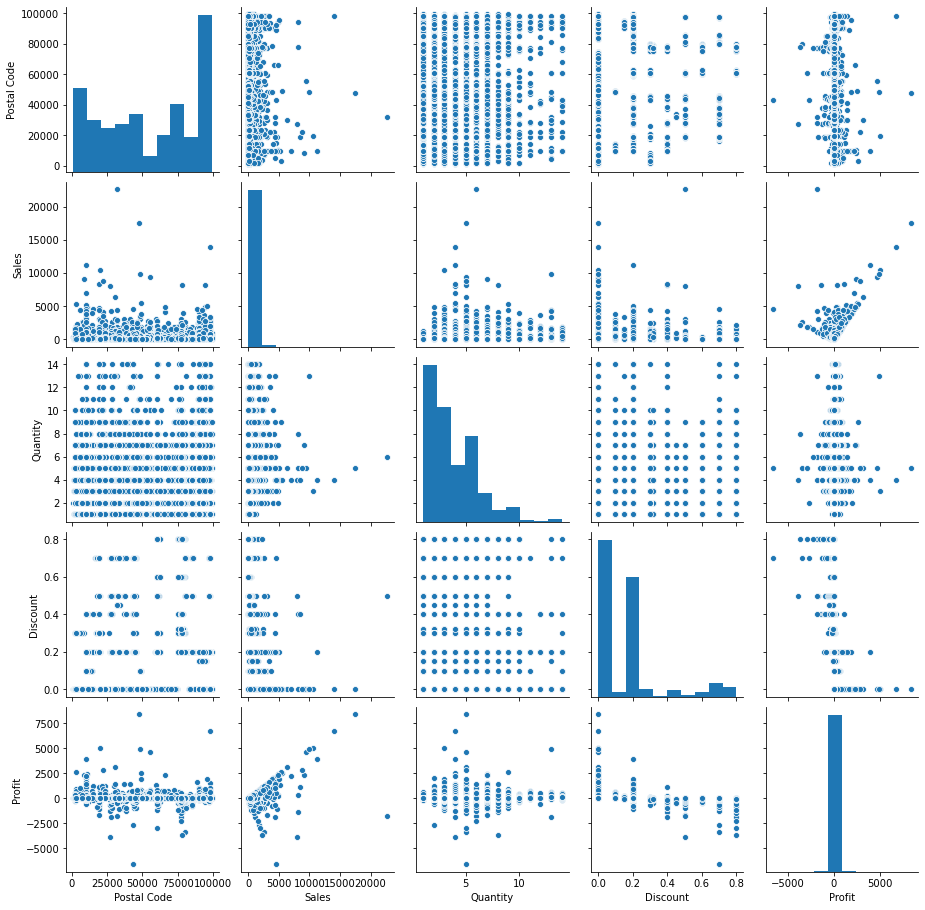

In [31]:
sns.pairplot(df)

## PRODUCT CATOGERIES-

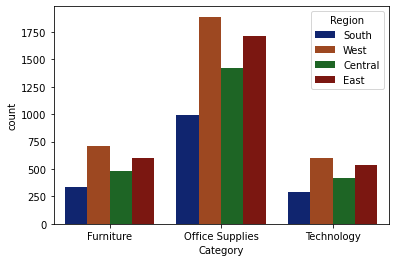

In [33]:
sns.countplot(x='Category',hue='Region',data=df,palette='dark')

## SUB-CATEGORIES-

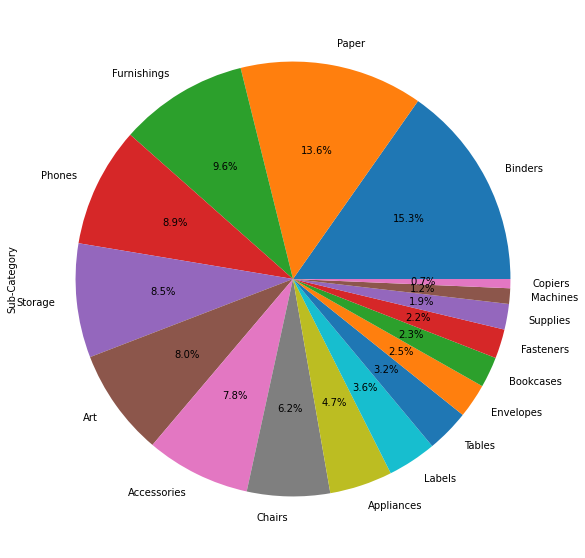

In [35]:
plt.figure(figsize=(15,10))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

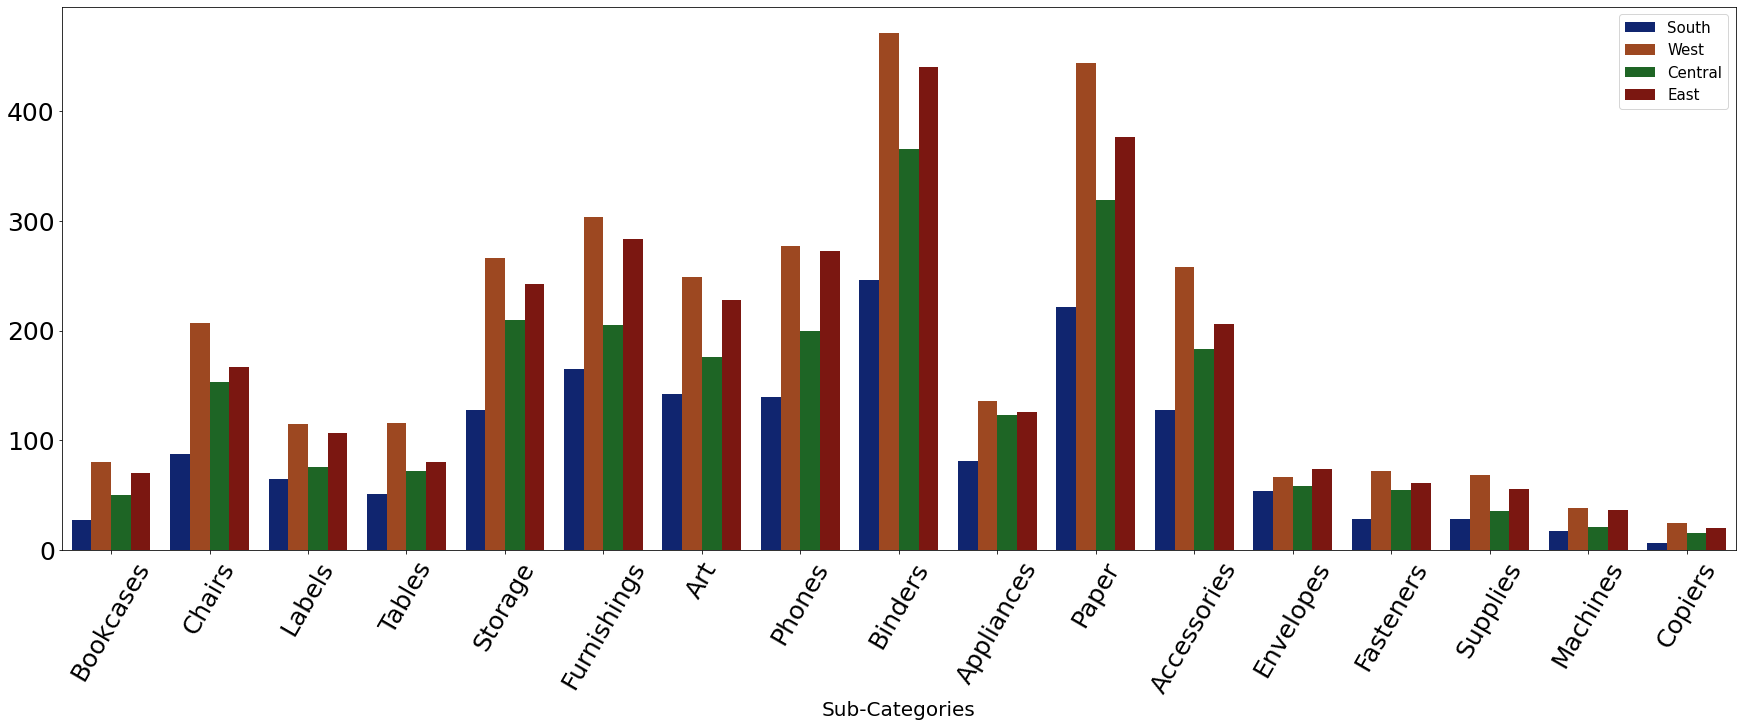

In [38]:
plt.figure(figsize=(30,10))
sns.countplot(x='Sub-Category',hue ='Region',data=df,palette='dark')
plt.xticks(rotation=60,fontsize=25)
plt.xlabel('Sub-Categories',fontsize = 20)
plt.ylabel('',fontsize=20)
plt.yticks(fontsize =25)
plt.legend(fontsize=15)

## STATE WITH HIGHER DEMAND

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

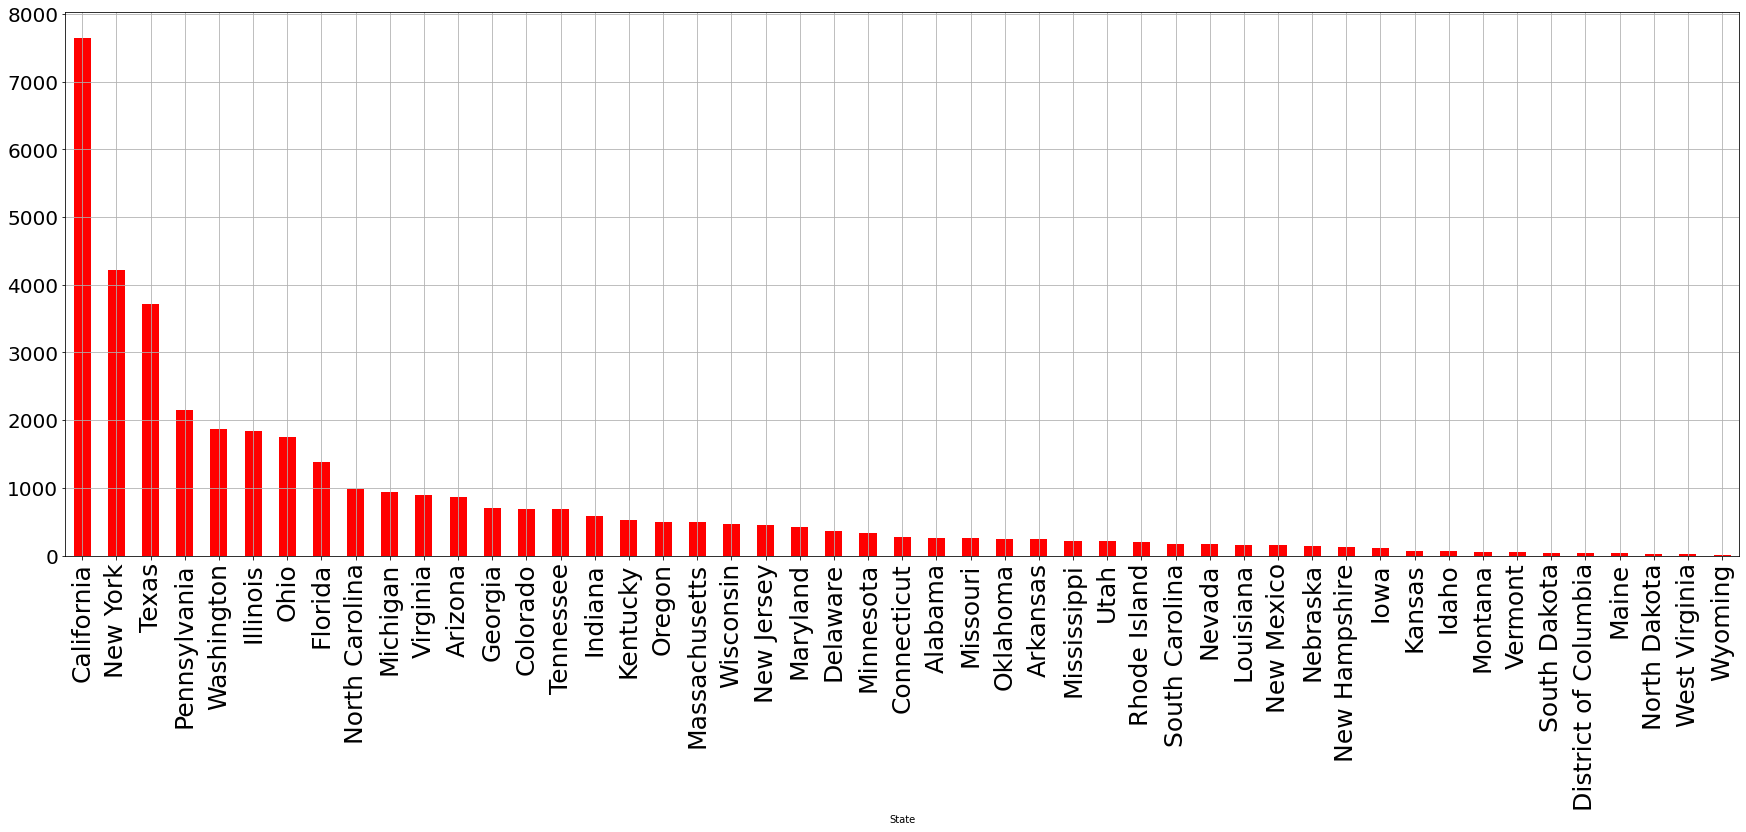

In [42]:
df.groupby('State')['Quantity'].sum().sort_values(ascending=False).plot(kind='bar',grid=True,figsize=(30,10),fontsize=20,color='r')
plt.xticks(fontsize=25)

## STATE VS PROFIT

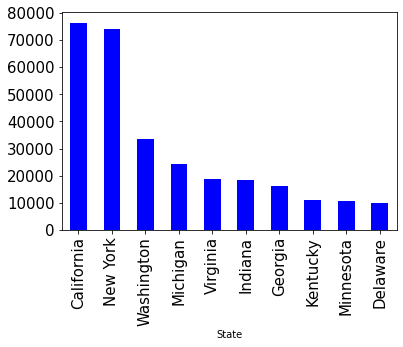

In [43]:
df.groupby('State')['Profit'].sum().sort_values(ascending=False)[:10].plot(kind='bar',color='b',fontsize=15)

## STATE WITH LOSS OR NEGATIVE PROFIT

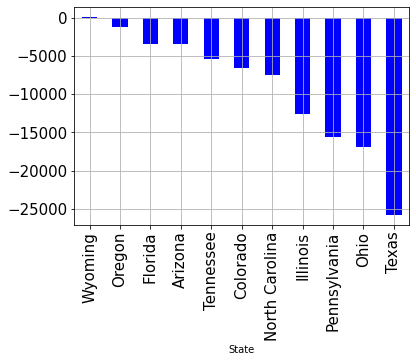

In [46]:
df.groupby('State')['Profit'].sum().sort_values(ascending=False)[-11:].plot(kind='bar',grid=True,color='b',fontsize=15)

## PROFIT VS SUB-CATEGORY

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

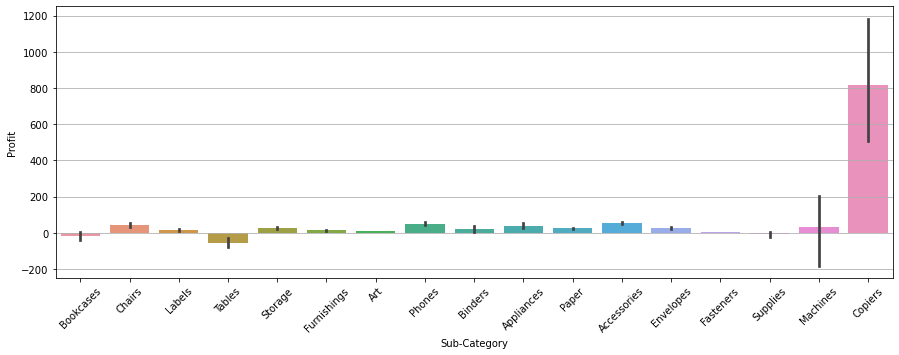

In [48]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.barplot(df['Sub-Category'],df['Profit'])
plt.xticks(rotation=45,fontsize=10)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

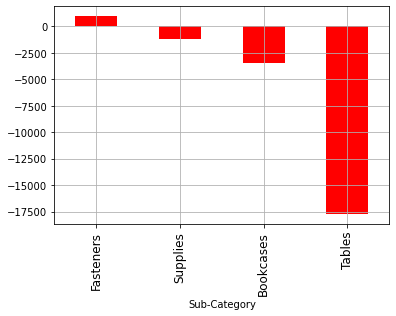

In [49]:
##products with loss
df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)[-4:].plot(kind='bar',grid=True,color='r')
plt.xticks(fontsize=12)

#### SO THERE ARE SOME STATES IN WHICH WE ARE FACING SOME LOSES

#### THREE PRODUCTS ARE ALSO REASON FOR THE LOSS